<a href="https://colab.research.google.com/github/PranavRathod399/Blacklace/blob/main/Blackjack/Amp-files/Graphene_Amplifier1_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Time vector for 1 second of signal sampled at 1000 Hz
time = np.linspace(0, 1, 1000)

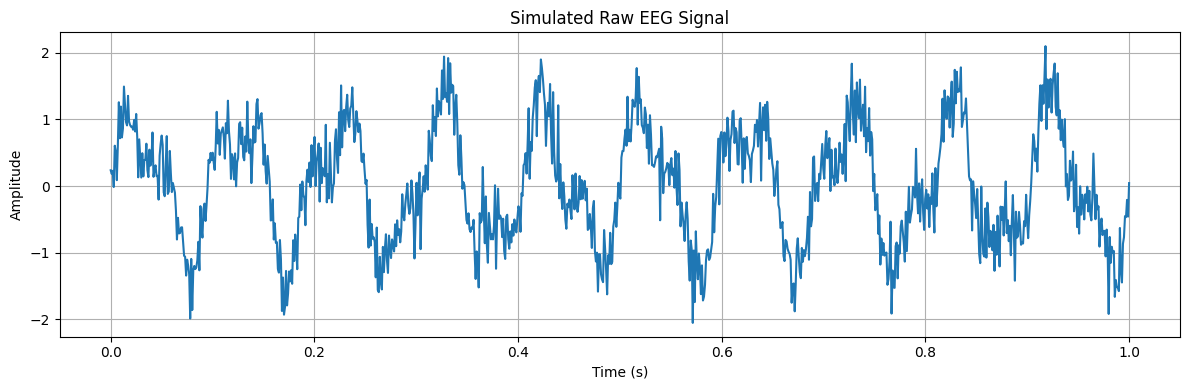

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Time vector for 1 second of signal sampled at 1000 Hz
t = np.linspace(0, 1, 1000)

# Simulate EEG signal with different frequency components
true_signal = np.sin(2 * np.pi * 10 * t) + 0.5 * np.sin(2 * np.pi * 22 * t)  # Simulated EEG (10Hz + 22Hz)

# Add noise
noise = 0.3 * np.random.normal(size=len(t))
raw_eeg = true_signal + noise

# Plot the raw EEG
plt.figure(figsize=(12, 4))
plt.plot(t, raw_eeg)
plt.title("Simulated Raw EEG Signal")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.tight_layout()
plt.show()

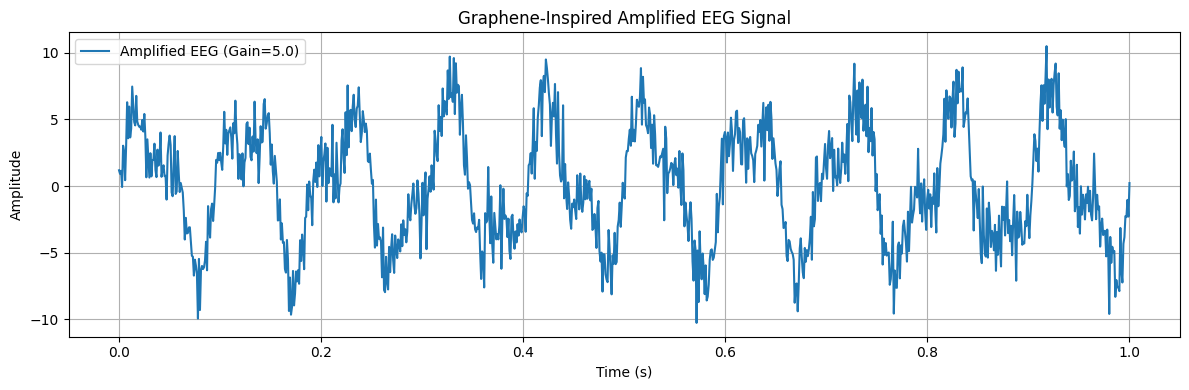

In [3]:
# Define a graphene-inspired amplifier
def graphene_amplifier(signal, gain=5.0):
    """
    Simulates a basic graphene-like amplifier with tunable gain.
    """
    amplified_signal = gain * signal
    return amplified_signal

# Apply the amplifier to the raw EEG signal
gain_value = 5.0  # You can change this dynamically
amplified_eeg = graphene_amplifier(raw_eeg, gain=gain_value)

# Plot amplified EEG
plt.figure(figsize=(12, 4))
plt.plot(t[:1000], amplified_eeg[:1000], label=f"Amplified EEG (Gain={gain_value})")
plt.title("Graphene-Inspired Amplified EEG Signal")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()

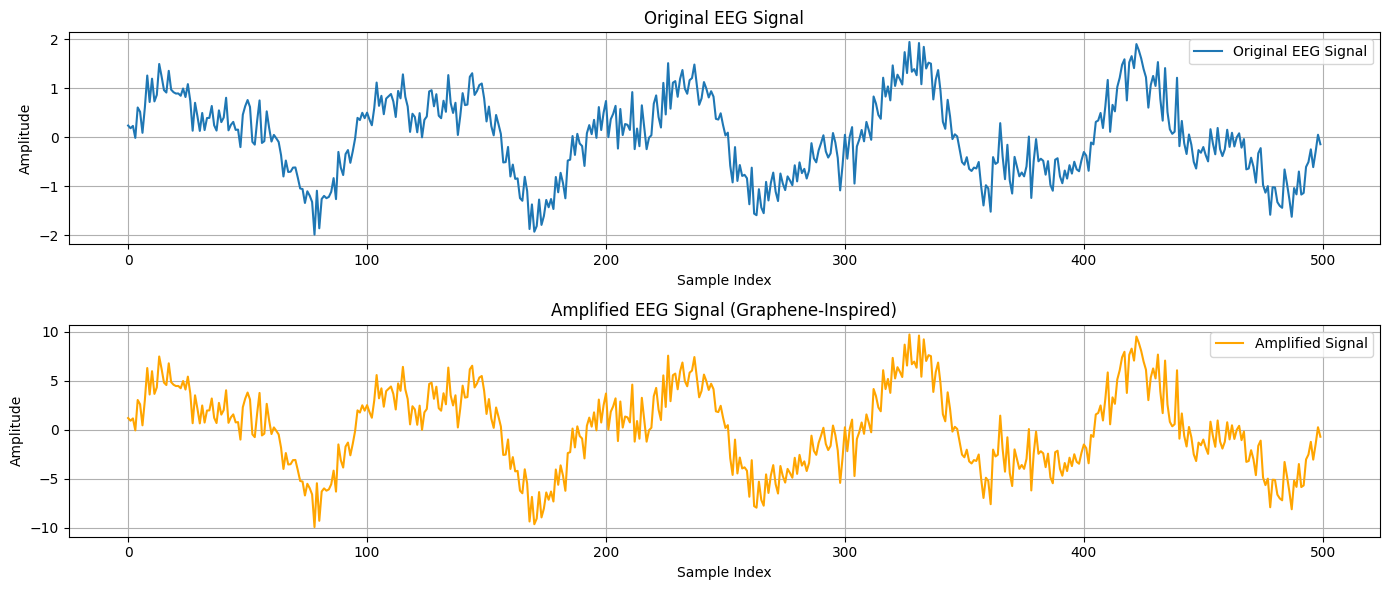

Original Signal RMS Power: 0.8448
Amplified Signal RMS Power: 4.2242
Gain Ratio: 5.00x


In [4]:
import matplotlib.pyplot as plt
import numpy as np

# 1. Plotting both signals
plt.figure(figsize=(14, 6))

plt.subplot(2, 1, 1)
plt.plot(raw_eeg[:500], label='Original EEG Signal') # Changed eeg_data to raw_eeg
plt.title('Original EEG Signal')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(amplified_eeg[:500], color='orange', label='Amplified Signal') # Changed amplified_signal to amplified_eeg
plt.title('Amplified EEG Signal (Graphene-Inspired)')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

# 2. Comparing signal power
original_power = np.sqrt(np.mean(raw_eeg**2)) # Changed eeg_data to raw_eeg
amplified_power = np.sqrt(np.mean(amplified_eeg**2)) # Changed amplified_signal to amplified_eeg

print(f"Original Signal RMS Power: {original_power:.4f}")
print(f"Amplified Signal RMS Power: {amplified_power:.4f}")
print(f"Gain Ratio: {amplified_power/original_power:.2f}x")

In [7]:
from scipy.ndimage import uniform_filter1d

# Function to calculate SNR
def calculate_snr(signal, window_size=50):
    # Estimate 'clean' signal using a moving average (low-pass)
    smoothed = uniform_filter1d(signal, size=window_size)
    noise = signal - smoothed
    signal_power = np.mean(smoothed**2)
    noise_power = np.mean(noise**2)
    snr = 10 * np.log10(signal_power / noise_power)
    return snr

# Calculate SNRs
original_snr = calculate_snr(raw_eeg)  # Use raw_eeg
amplified_snr = calculate_snr(amplified_eeg) # Use amplified_eeg

print(f"Original Signal SNR: {original_snr:.2f} dB")
print(f"Amplified Signal SNR: {amplified_snr:.2f} dB")

Original Signal SNR: -1.20 dB
Amplified Signal SNR: -1.20 dB
